# Health Expectation

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print('pandas version: ', pd.__version__)
print('seaborn version: ', sns.__version__)
print('matplotlib version: ', matplotlib.__version__)


pandas version:  2.3.3
seaborn version:  0.13.2
matplotlib version:  3.10.7


In [8]:
df = sns.load_dataset('healthexp')

df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


## Votre mission 🕵🏻‍♂️🕵🏻‍♀️

1. Déterminez quelles sont les variables <i>discrètes</i> et <i>continues</i> dans le dataset.
2. Analysez la variable <b>Country</b>
3. Analysez la variable <b>Spending_USD</b>
    - Formulez de manière claire une phrase sur ce que signifie la moyenne de cette variable
    - Réalisez 2 graphiques utiles à cette analyse
4. Même chose pour <b>Life_Expectancy</b>
5. Observez l'évolution de la durée de vie à travers le temps
6. Comment améliorer ce graphique ? 
7. Observez l'évolution des dépenses en santé de l'Allemagne et de la Grande Bretagne à travers le temps
8. Observez l'histogramme, le boxplot et les statistiques de <b>Life_Expectancy</b> propre à chaque pays

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [10]:
df.nunique()

Year                51
Country              6
Spending_USD       274
Life_Expectancy    118
dtype: int64

### 1. Déterminez quelles sont les variables <i>discrètes</i> et <i>continues</i> dans le dataset.

Pour rappel, les variables <i>discrètes</i> sont des variables pouvant être infini mais dénombrable, dès lors la bonne réponse ici est :
 - Country
 - Year

À l'inverse, les variables pouvant se <b>mesurer</b> sont des variables <i>continues</i> donc :
 - Spending_USD
 - Life_Expectancy

 

### 2. Analysez la variable <b>Country</b>

In [15]:
df['Country'].value_counts().sort_values()

Country
France           35
Great Britain    43
Canada           44
Germany          50
USA              51
Japan            51
Name: count, dtype: int64

Qu'est ce qu'on voit ici ?

Déjà, on peut voir que la France est sous représentée dans le jeu de données.

In [13]:
df['Country'].value_counts(normalize=True).round(2)

Country
USA              0.19
Japan            0.19
Germany          0.18
Canada           0.16
Great Britain    0.16
France           0.13
Name: proportion, dtype: float64

<Axes: title={'center': "Nombre d'apparition des pays dans le jeu de données"}, xlabel='Country'>

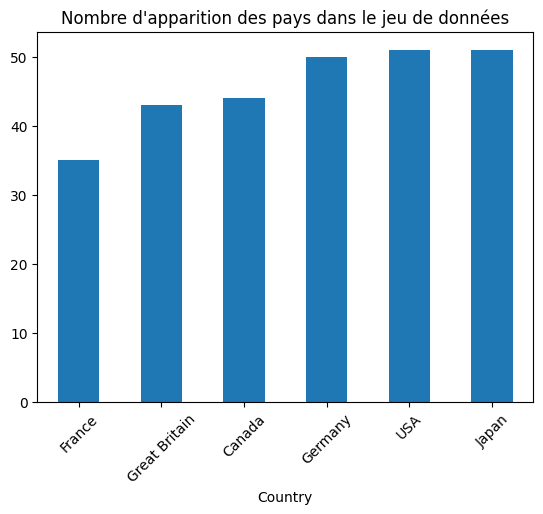

In [26]:
(
    df['Country']
        .value_counts()
        .sort_values()
        .plot(kind="bar", rot=45, title="Nombre d'apparition des pays dans le jeu de données")
)

<Axes: xlabel='Country', ylabel='count'>

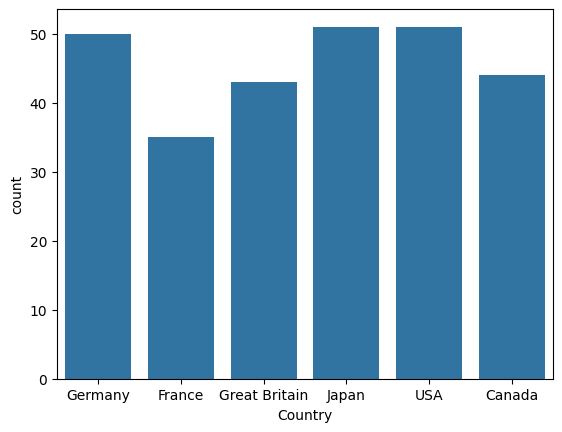

In [27]:
sns.countplot(data=df, x='Country')

### 3. Analysez la variable <b>Spending_USD</b>

In [6]:
df['Spending_USD'].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

<b>Qu'est ce qu'on voit ici ? 🔍</b>

On observe une moyenne égale à 2789$ avec un écart-type de 2194$, les deux valeurs sont presque égale, c'est assez étonnant.

On note également que la médiane est inférieur de presque 500$ de moins que la moyenne.

<b>Il faut rajouter du contexte à tout ça :</b>

La France, les Usa, le Canada, le Japon, l'Allemagne et la Grande Bretagne ont dépensé ensemble en moyenne 2789USD par an de 1970 à 2020 avec un écart type de 2194USD.

Le pays avec la plus grande dépense est de 11 859 USD et le pays le plus faible 123USD.

<b> Ok mais lesquels ? Quand ?</b>



In [28]:
df[df['Spending_USD'] == 11859.179000]

,Year,Country,Spending_USD,Life_Expectancy
273,2020,USA,11859.179,77.0


In [30]:
df[df['Spending_USD'] == 123.993000]

,Year,Country,Spending_USD,Life_Expectancy
2,1970,Great Britain,123.993,71.9


> Vous voyez qu'on ne peut pas vraiment comparer la plus grande et la plus petite dépense finalement, l'une est en 2020 et l'autre en 1970.

In [32]:
# Il faut filtrer le dataframe
df_1970 = df[df['Year'] == 1970]
df_1970.describe()

,Year,Spending_USD,Life_Expectancy
count,5.0,5.00000,5.000000
mean,1970.0,209.16900,71.520000
std,0.0,81.74728,0.719027
min,1970.0,123.99300,70.600000
25%,1970.0,150.43700,70.900000
50%,1970.0,192.14300,71.900000
75%,1970.0,252.31100,72.000000
max,1970.0,326.96100,72.200000


In [38]:
df_2020 = df[df['Year'] == 2020]
df_2020.describe()

,Year,Spending_USD,Life_Expectancy
count,6.0,6.000000,6.000000
mean,2020.0,6629.874167,81.200000
std,0.0,2679.057093,2.529822
min,2020.0,4665.641000,77.000000
25%,2020.0,5131.129500,80.575000
50%,2020.0,5648.371000,81.400000
75%,2020.0,6661.318250,82.150000
max,2020.0,11859.179000,84.700000


<Axes: xlabel='Spending_USD'>

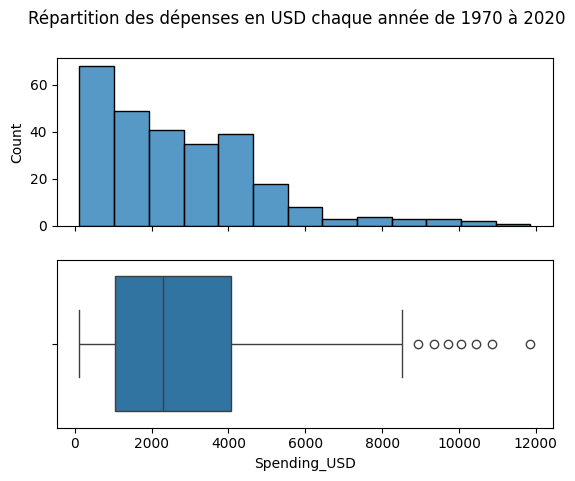

In [ ]:
fig, ax= plt.subplots(2, 1, sharex=True)
plt.suptitle('Répartition des dépenses en santé en USD de 1970 à 2020')
sns.histplot(df, x='Spending_USD', ax = ax[0])
sns.boxplot(df, x='Spending_USD', ax = ax[1])


### 4. Même chose pour <b>Life_Expectancy</b>

In [50]:
df['Life_Expectancy'].describe()

count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64

Parmi tous les pays du dataset, on observe une moyenne d'espérance de vie à 77 ans.

Un minimum de 70 ans et un maximum de 84 ans.

L'écart-type est quant à lui assez faible avec 3 ans

> Ca soulève des questions, quels sont les pays avec la plus forte, la plus faible espérance ? Quel est le pays où l'espérance a le plus évolué au cours du temps ? D'ailleurs a-t'elle bien évoluée ? ...

<Axes: xlabel='Life_Expectancy'>

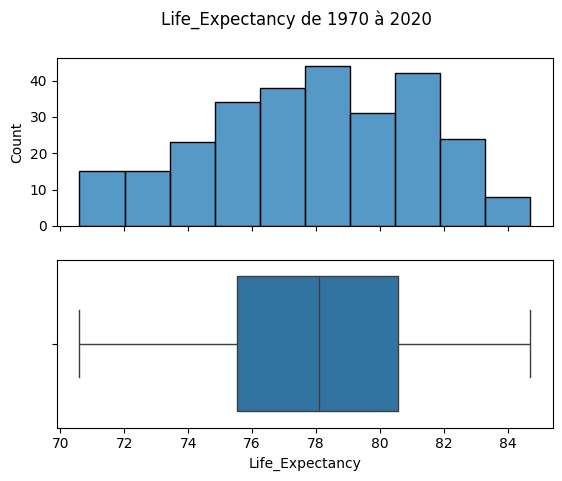

In [48]:
fig, ax= plt.subplots(2, 1, sharex=True)
plt.suptitle('Life_Expectancy de 1970 à 2020')
sns.histplot(df, x='Life_Expectancy', ax = ax[0])
sns.boxplot(df, x='Life_Expectancy', ax = ax[1])

### 5. Observez l'évolution de la durée de vie à travers le temps

<Axes: xlabel='Year'>

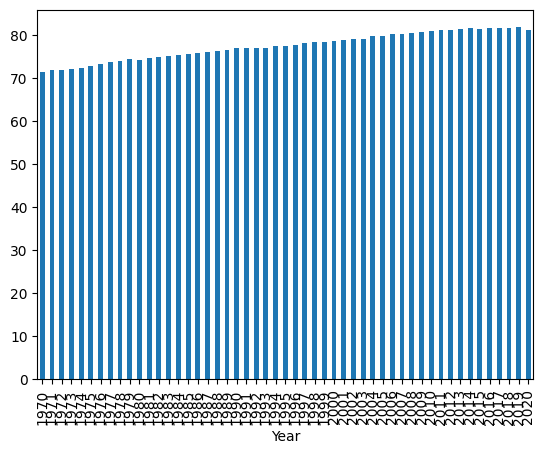

In [52]:
df.groupby('Year')['Life_Expectancy'].mean().plot(kind='bar')

> C'est illisible 🙄, améliorons ça.

In [53]:
df.groupby('Year')['Life_Expectancy'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1970,5.0,71.520000,0.719027,70.6,70.900,71.90,72.000,72.2
1971,5.0,71.920000,0.936483,70.8,71.200,71.90,72.800,72.9
1972,3.0,71.800000,1.216553,71.0,71.100,71.20,72.200,73.2
1973,3.0,72.033333,1.184624,71.3,71.350,71.40,72.400,73.4
1974,3.0,72.400000,1.153256,71.5,71.750,72.00,72.850,73.7
1975,4.0,72.850000,1.190238,71.4,72.375,72.85,73.325,74.3
1976,4.0,73.325000,1.278997,71.8,72.625,73.35,74.050,74.8
1977,3.0,73.700000,1.442221,72.5,72.900,73.30,74.300,75.3
1978,3.0,73.866667,1.680278,72.4,72.950,73.50,74.600,75.7


<Axes: xlabel='Year', ylabel='Life_Expectancy'>

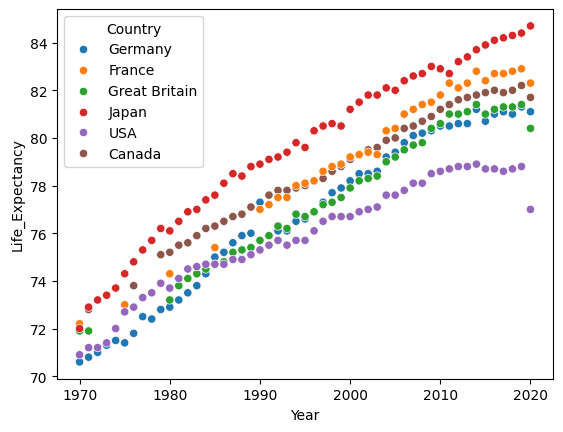

In [51]:
sns.scatterplot(df, x='Year', y='Life_Expectancy', hue='Country')

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

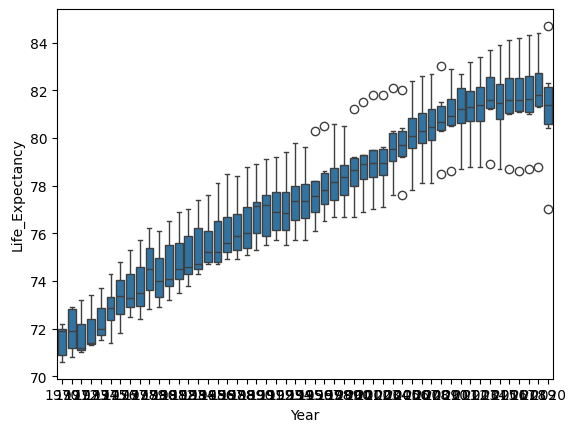

In [57]:
sns.boxplot(df, x='Year', y='Life_Expectancy')


### 7. Analysez l'évolution des dépenses en santé de l'Allemagne et de la GB à travers le temps

<Axes: xlabel='Year', ylabel='Spending_USD'>

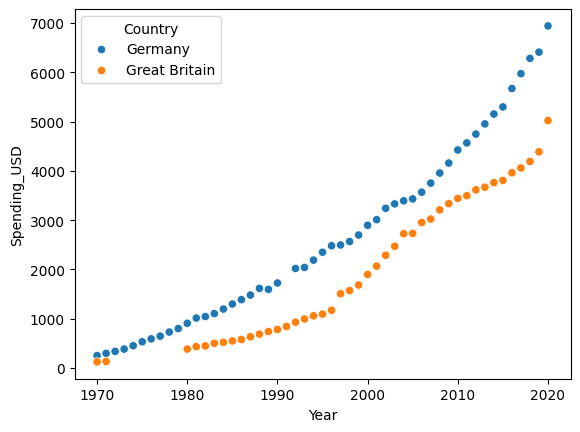

In [73]:
sns.scatterplot(data=df.query("Country == 'Germany' | Country == 'Great Britain'"), x='Year', y='Spending_USD', hue='Country')

On observe ici qu'historiquement, l'Allemagne a toujours une dépense plus élevé au cours du temps par rapport à la Grande Bretagne.

In [72]:
df_ger_gb = df[(df['Country'] == 'Germany') | (df['Country'] == 'Great Britain')]
df_ger_gb


,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
2,1970,Great Britain,123.993,71.9
6,1971,Germany,298.251,70.8
7,1971,Great Britain,134.172,71.9
10,1972,Germany,337.364,71.0
...,...,...,...,...
259,2018,Great Britain,4189.708,81.3
263,2019,Germany,6407.928,81.3
265,2019,Great Britain,4385.463,81.4
269,2020,Germany,6938.983,81.1


### 8. Observez l'histogramme, le boxplot et les statistiques de <b>Life_Expectancy</b> propre à chaque pays

In [78]:
df.groupby('Country')['Life_Expectancy'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,44.0,78.706818,2.502222,72.8,76.775,78.7,80.975,82.2
France,35.0,79.565714,2.862120,72.2,78.050,79.4,82.200,82.9
Germany,50.0,76.726000,3.473915,70.6,73.575,77.1,80.175,81.3
Great Britain,43.0,77.620930,2.827548,71.9,75.350,77.5,80.400,81.4
Japan,51.0,79.554902,3.547242,72.0,76.950,79.8,82.650,84.7
USA,51.0,75.843137,2.336258,70.9,74.550,75.7,77.950,78.9


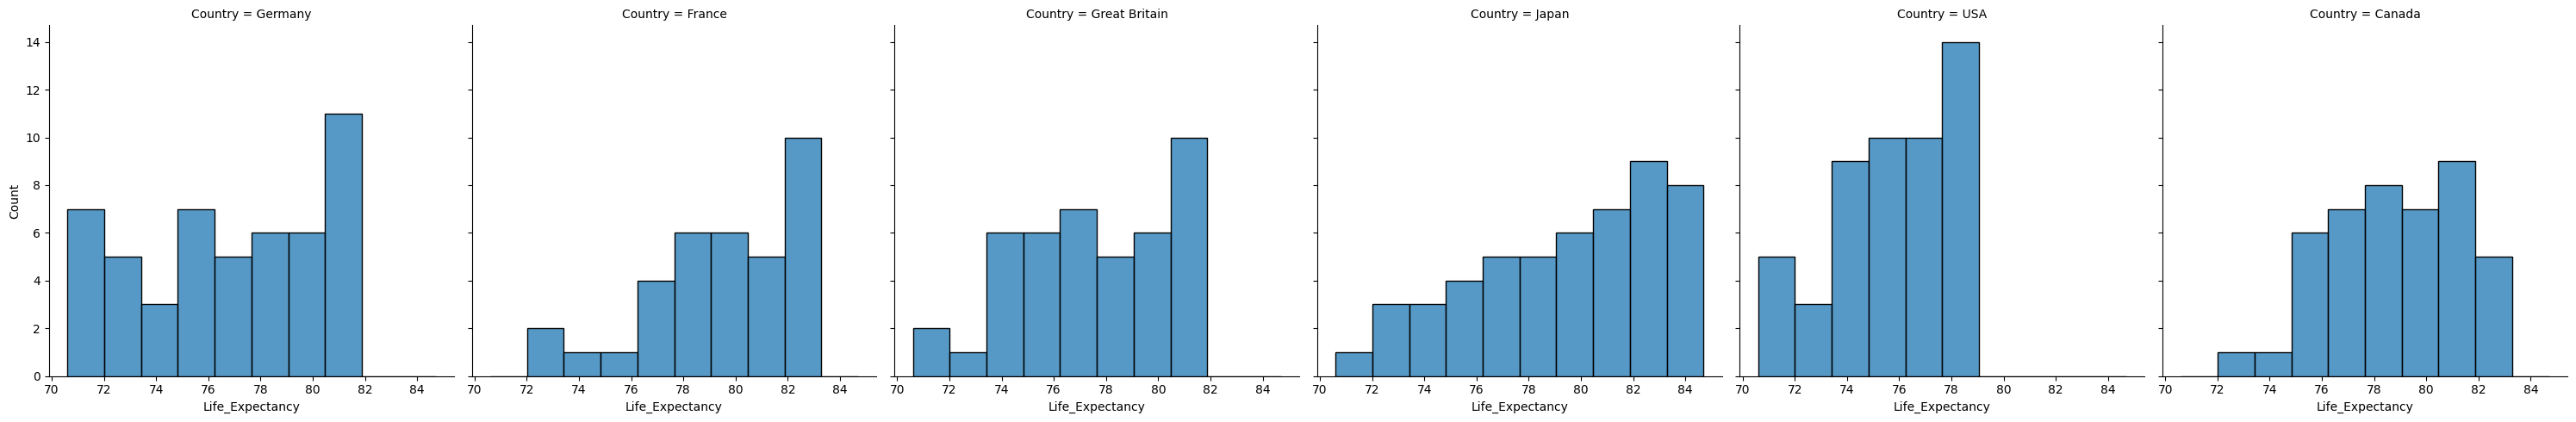

In [75]:
sns.displot(df, x='Life_Expectancy', col='Country')

<Axes: xlabel='Life_Expectancy', ylabel='Country'>

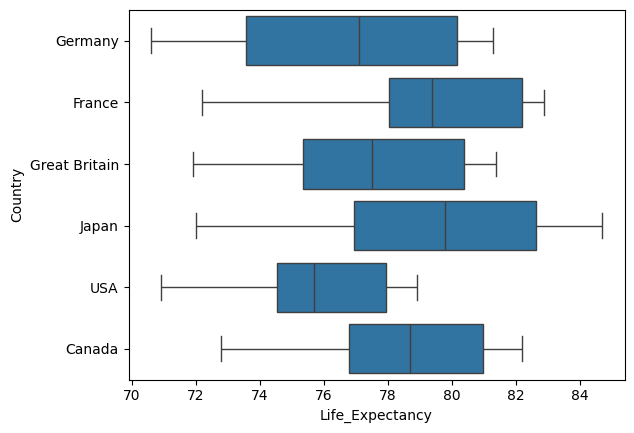

In [76]:
sns.boxplot(df, x='Life_Expectancy', y='Country')

### 9. Analysez la relation entre la durée de vie et les dépenses dans la santé aux USA entre 2000 et 2020

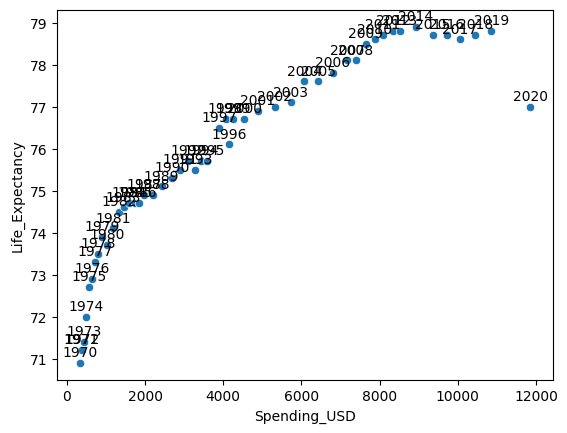

In [84]:
sns.scatterplot(df.query("Country == 'USA' & 'Year' >= '2000'"), x="Spending_USD", y="Life_Expectancy")

for index, row in df.query("Country == 'USA' & 'Year' >= '2000'").iterrows():
    plt.text(row["Spending_USD"], row["Life_Expectancy"] + 0.15, str(row["Year"]), color="black", ha="center")

